<a href="https://colab.research.google.com/github/Elisabeths25/Driver-Habit-Analyst/blob/main/Driver_Analyst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Challenge

In [ ]:
# If additional packages are needed but are not installed by default, uncomment the last two lines of this cell
# and replace <package list> with a list of additional packages.
# This will ensure the notebook has all the dependencies and works everywhere

#import sys
#!{sys.executable} -m pip install <package list>

In [1]:
import sys
!{sys.executable} -m pip install wget
!{sys.executable} -m pip install shutil

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=a280cd9c8b15afca47775524cb6b1f51cd96644bd39a16bb29ef8ab3e468b71d
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement shutil (from versions: none)
ERROR: No matching distribution found for shutil


In [2]:
# Libraries
import pandas as pd
import os
from shutil import unpack_archive
pd.set_option("display.max_columns", 101)

## Dataset

In [3]:
# Run this cell block to download and extract image data
!wget 'https://hr-projects-assets-prod.s3.amazonaws.com/1iaanii247i/8c7bc0c59ee6bcdb3646a1997606a9d0/test.zip'
!wget 'https://hr-projects-assets-prod.s3.amazonaws.com/1iaanii247i/ffe8804da24b94ee410a8730ba297dfc/train_0.zip'
!wget 'https://hr-projects-assets-prod.s3.amazonaws.com/1iaanii247i/5460fcc87e2d7f7e19c17f719e0df00a/train_1.zip'

print('Extracting Train Dataset : Label 1')
unpack_archive('train_1.zip', '')

print('Extracting Train Dataset : Label 0')
unpack_archive('train_0.zip', '')

print('Extracting Test Dataset')
unpack_archive('test.zip', '')

print('Dataset Extracted')


os.remove('train_1.zip')
os.remove('train_0.zip')
os.remove('test.zip')
print('Extra Files Removed')

--2022-08-31 05:39:37--  https://hr-projects-assets-prod.s3.amazonaws.com/1iaanii247i/8c7bc0c59ee6bcdb3646a1997606a9d0/test.zip
Resolving hr-projects-assets-prod.s3.amazonaws.com (hr-projects-assets-prod.s3.amazonaws.com)... 3.5.8.19
Connecting to hr-projects-assets-prod.s3.amazonaws.com (hr-projects-assets-prod.s3.amazonaws.com)|3.5.8.19|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58948996 (56M) [application/zip]
Saving to: ‘test.zip’

test.zip            100%[===================>]  56.22M  59.3MB/s    in 0.9s    

2022-08-31 05:39:38 (59.3 MB/s) - ‘test.zip’ saved [58948996/58948996]

--2022-08-31 05:39:39--  https://hr-projects-assets-prod.s3.amazonaws.com/1iaanii247i/ffe8804da24b94ee410a8730ba297dfc/train_0.zip
Resolving hr-projects-assets-prod.s3.amazonaws.com (hr-projects-assets-prod.s3.amazonaws.com)... 3.5.8.19
Connecting to hr-projects-assets-prod.s3.amazonaws.com (hr-projects-assets-prod.s3.amazonaws.com)|3.5.8.19|:443... connected.
HTTP request 

## Data Description

Column | Description
:---|:---
`file` | Image name
`label` | Target Label (1/0)

In [7]:
# The train label dataset is already loaded below
data = pd.read_csv("train_labels.csv")

In [8]:
data.head()

,file,label
0,img_44733.jpg,1
1,img_72999.jpg,1
2,img_25094.jpg,1
3,img_69092.jpg,1
4,img_92629.jpg,1


In [9]:
#split data train, validasi and test, but we only use train and validation
import sys
!{sys.executable} -m pip install split-folders
import splitfolders 
input_folder ='/content/train'

splitfolders.ratio(input_folder, output="/content/output", 
                   seed=4015, ratio=(.7,.3), 
                   group_prefix= None)

splitfolders.fixed(input_folder, output="/content/output",
                   seed=4015, fixed=(100,100),
                   oversample=False, group_prefix=None)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Copying files: 4015 files [00:00, 5483.69 files/s]
Copying files: 4015 files [00:00, 4600.79 files/s]


In [10]:
train_0_dir = os.path.join('/content/output/train/0')
train_1_dir = os.path.join('/content/output/train/1')
val_0_dir = os.path.join('/content/output/val/0')
val_1_dir = os.path.join('/content/output/val/1')
test_dir = os.path.join('/content/test')

In [11]:
# Accesing Data Names

train_0_names = os.listdir(train_0_dir)
train_1_names = os.listdir(train_1_dir)

In [12]:
# Data lengths

print('total training 0 images:', len(os.listdir(train_0_dir)))
print('total training 1 images:', len(os.listdir(train_1_dir)))
print('total validation 0 images:', len(os.listdir(val_0_dir)))
print('total validation 1 images:', len(os.listdir(val_1_dir)))
print('total test images:',len(os.listdir(test_dir)))

total training 0 images: 1826
total training 1 images: 1789
total validation 0 images: 608
total validation 1 images: 597
total test images: 1401


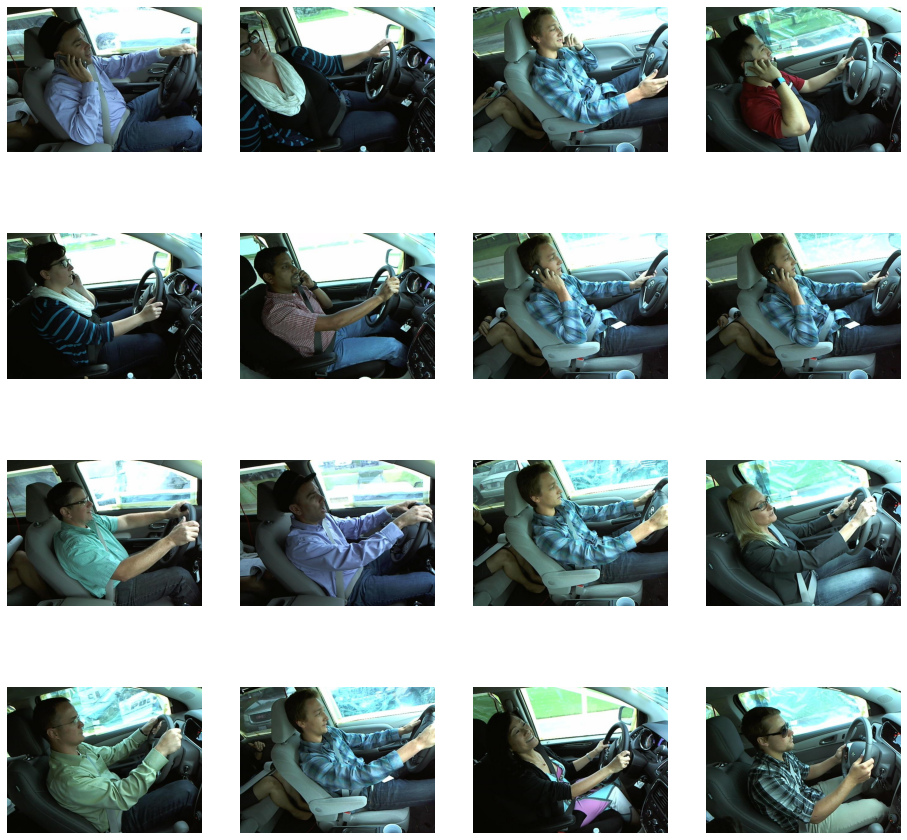

In [13]:
# Show Images

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_0_pix = [os.path.join(train_0_dir, fname) 
                for fname in train_0_names[pic_index-8:pic_index]]
next_1_pix = [os.path.join(train_1_dir, fname) 
                for fname in train_1_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_0_pix+next_1_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

## Machine Learning

Build a neural network that can classify the driver’s behaviour.
- **The model's performance will be evaluated on the basis of accuracy.**

In [14]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [44]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.90):
      print("\nReached 80% accuracy so cancelling training!")
      self.model.stop_training = True
callback = myCallback()

In [45]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(300,300,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(1,activation=tf.nn.sigmoid)
])

In [46]:
# Gets the summary of the learning

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 149, 149, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 147, 147, 64)      18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 73, 73, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 71, 71, 128)       73856     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 35, 35, 128)     

In [47]:
from tensorflow.keras.optimizers import RMSprop

# Compile model with RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001), loss="binary_crossentropy", metrics = ["accuracy"])

#Data Procesing

In [48]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set up Data generator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      validation_split=0.3,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale=1./255)

In [49]:
# Preprocess Data
train_generator = train_datagen.flow_from_directory(
    '/content/output/train/',
    target_size=(300,300),
    batch_size=100,
    class_mode="binary")

validation_generator = validation_datagen.flow_from_directory(
    '/content/output/val/',
    target_size=(300,300),
    batch_size=30,
    class_mode="binary")

Found 3615 images belonging to 2 classes.
Found 1205 images belonging to 2 classes.


In [50]:
# Fit model
history = model.fit(
    train_generator,
    validation_data =validation_generator,
    epochs=50,
    steps_per_epoch=37,
    validation_steps=41,
    verbose=1,
    callbacks=[callback])

Epoch 1/50
37/37 [==============================] - 92s 2s/step - loss: 1.8017 - accuracy: 0.5015 - val_loss: 0.9696 - val_accuracy: 0.5046
Epoch 2/50
37/37 [==============================] - 91s 2s/step - loss: 0.7104 - accuracy: 0.5059 - val_loss: 0.6928 - val_accuracy: 0.5046
Epoch 3/50
37/37 [==============================] - 90s 2s/step - loss: 0.6944 - accuracy: 0.5029 - val_loss: 0.6920 - val_accuracy: 0.5046
Epoch 4/50
37/37 [==============================] - 89s 2s/step - loss: 0.7141 - accuracy: 0.5084 - val_loss: 0.6918 - val_accuracy: 0.5054
Epoch 5/50
37/37 [==============================] - 90s 2s/step - loss: 0.7102 - accuracy: 0.5278 - val_loss: 0.6913 - val_accuracy: 0.5095
Epoch 6/50
37/37 [==============================] - 90s 2s/step - loss: 0.6948 - accuracy: 0.5120 - val_loss: 0.6921 - val_accuracy: 0.5344
Epoch 7/50
37/37 [==============================] - 89s 2s/step - loss: 0.7035 - accuracy: 0.5333 - val_loss: 0.6887 - val_accuracy: 0.5759
Epoch 8/50
37/37 [==

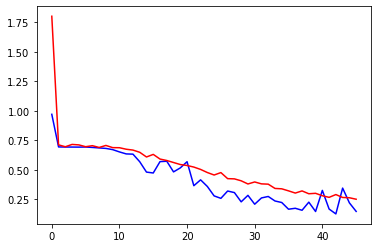

In [51]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_loss'], "b", label = 'val_loss')
plt.plot(history.history['loss'], "r", label = 'loss')


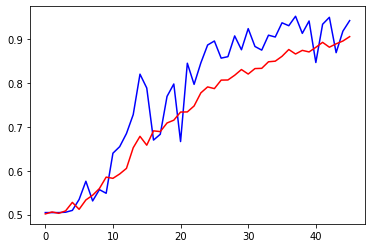

In [52]:

plt.plot(history.history['val_accuracy'], "b", label = 'val_accuracy')
plt.plot(history.history['accuracy'], "r", label = 'accuracy')

In [55]:
model.save("model_driverhabits.h5")